# Enhanced Biomedical Data Analysis: Balanced Model Evaluation
**Objective:** Improve diabetes prediction and interpret model using feature importance, confusion matrix, and precision-recall curve.\
	• A Random Forest model trained with balanced data using SMOTE\
	• Feature importance chart to show what influences predictions\
	• Confusion matrix to visualize true vs. predicted results\
	• Precision-Recall curve for evaluating diabetes detection

Dataset: [Kaggle - Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [3]:
# !pip install pandas matplotlib seaborn scikit-learn imbalanced-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [3]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
X = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

## Train Model on Resampled Data

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]  # for precision-recall curve
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     65605
         1.0       0.45      0.20      0.27     10499

    accuracy                           0.86     76104
   macro avg       0.67      0.58      0.60     76104
weighted avg       0.82      0.86      0.83     76104



## Confusion Matrix

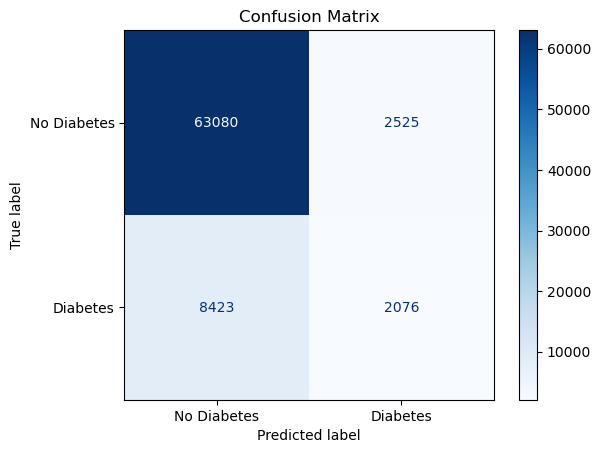

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance

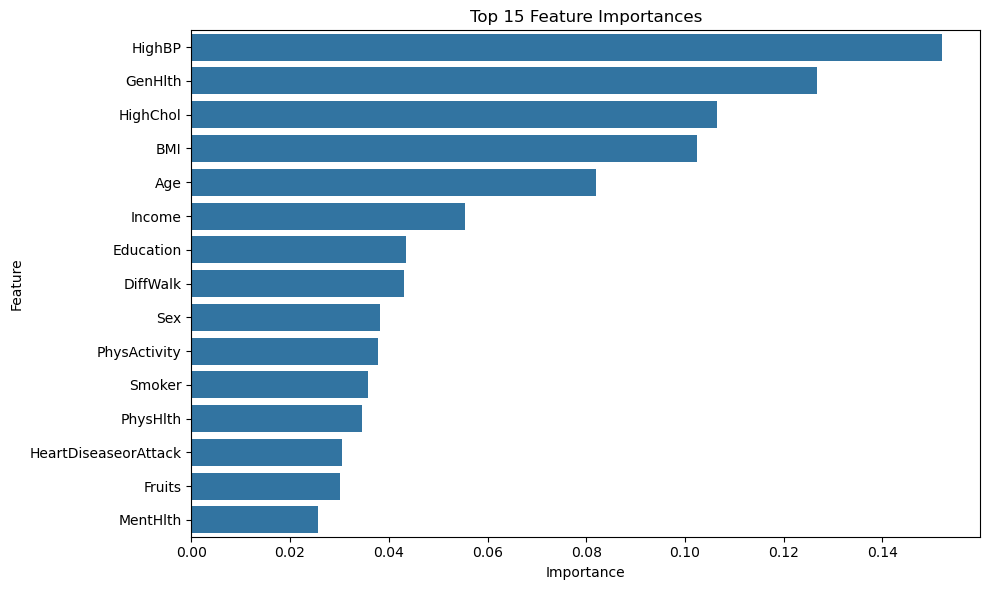

In [10]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Precision-Recall Curve

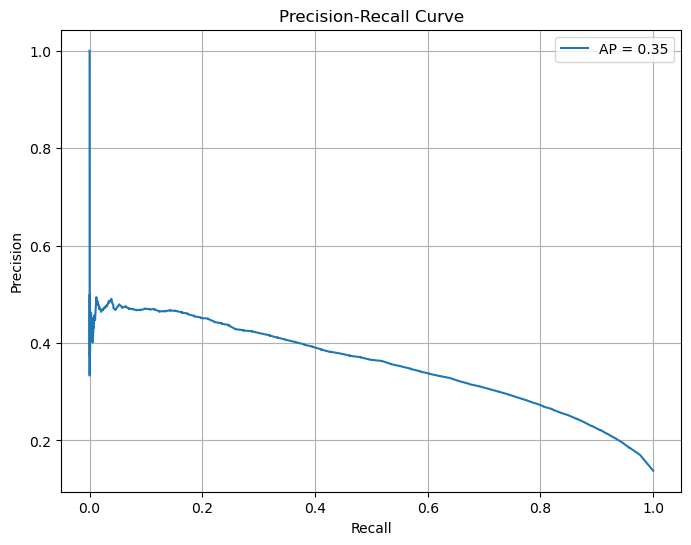

In [15]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

### 1. Confusion Matrix – What Predictions Did the Model Get Right or Wrong?

The confusion matrix shows four key numbers:
	•	Top-left (63,080): People who didn’t have diabetes and were correctly predicted — true negatives.
	•	Bottom-right (2,076): People who had diabetes and were correctly predicted — true positives.
	•	Top-right (2,525): People who didn’t have diabetes, but the model said they did — false positives.
	•	Bottom-left (8,423): People who had diabetes, but the model missed them — false negatives.

**Insight:** While the model performs well for non-diabetic individuals, it still misses a lot of diabetic cases, which is a common challenge in imbalanced medical datasets.

### 2. Feature Importance – What Matters Most for Predicting Diabetes?

The bar chart ranks the top features that influence the model’s predictions. The most important include:
	•	HighBP (high blood pressure)
	•	GenHlth (general health rating)
	•	HighChol (high cholesterol)
	•	BMI (Body Mass Index)
	•	Age and Income

**Insight:** These features make biological sense — high blood pressure, cholesterol, BMI, and age are well-known diabetes risk factors. It shows the model is learning meaningful patterns, not random noise.

### 3. Precision-Recall Curve – How Well Does the Model Detect Diabetes Cases?

This curve tells us how good the model is at finding diabetic patients without raising too many false alarms. Here’s how to interpret it:
	•	Precision answers: “Of all patients flagged as diabetic, how many actually are?”
	•	Recall answers: “Of all actual diabetic patients, how many did we find?”
	•	AP (Average Precision) = 0.35 is a summary score — higher is better.

**Insight:** A precision of around 35% is modest, but it’s an improvement compared to earlier (pre-SMOTE). In medical applications, we often care more about recall to catch as many true cases as possible.

### Summary Outcome Learning:

• How to handle imbalanced data using SMOTE\
• How to train and test machine learning models in biomedical contexts\
• How to interpret results using *Confusion matrix (errors and accuracy), Feature importance (what influences predictions) and Precision-recall curve (ability to find true positive cases)*